In [30]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# reads the data from the file

df = pd.read_csv('/Users/kaidenjones/Desktop/localify_lab4_data.tsv', sep='\t')
# df = pd.read_csv('/Users/cymoar/COMP-ML/Labs/ML-Lab4/localify_music_genre-song_dataset_short_limited.tsv', sep='\t')

# Slpits the data into training and validation data
df_training = df.iloc[:8000]
df_validation = df.iloc[8000:]

# spit the data into labels, X, y
training_label_df = df_training[['song_name','artist_name']]
tensor_label = tf.convert_to_tensor(training_label_df)
training_X_df = df_training[['acousticness','danceability','energy','instrumentalness',
                             'liveness','loudness','speechiness','tempo','valence']]
tensor_training_X = tf.convert_to_tensor(training_X_df)
training_y_df = df_training[['genre_name','Unnamed: 12']]

# tensor_training_y1 = tf.convert_to_tensor(training_y_df[['genre_name']])
tensor_training_y = tf.convert_to_tensor(training_y_df[['Unnamed: 12']], dtype=tf.float32)
tty2 = tf.convert_to_tensor(training_y_df[['Unnamed: 12']])
vector_y = tf.reshape(tty2, [8000])

validation_label_df = df_validation[['song_name','artist_name']]
validation_X_df = df_validation[['acousticness','danceability','energy','instrumentalness','liveness',
                                 'loudness','speechiness','tempo','valence']]
validation_y_df = df_validation[['genre_name','Unnamed: 12']]

tensor_validation_X = tf.convert_to_tensor(validation_X_df)
training_y_df = df_training[['genre_name','Unnamed: 12']]

# tensor_training_y1 = tf.convert_to_tensor(training_y_df[['genre_name']])
tensor_validation_y = tf.convert_to_tensor(validation_y_df[['Unnamed: 12']], dtype=tf.float32)
tvy2 = tf.convert_to_tensor(validation_y_df[['Unnamed: 12']])
validation_vector_y = tf.reshape(tvy2, [2000])

In [98]:
# Model archecture
# model = Sequential([
#     Dense(units=25, activation="relu"),
#     Dense(units=15, activation="relu"),
#     Dense(units=10 , activation="linear")])

new_lambda_value = .0001

# model = Sequential([
#     Dense(units=10, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=20, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=30, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=40, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=50, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=50, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=40, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=30, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=20, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=10 , activation="linear", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value))])

# model = Sequential([
#     Dense(units=50, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=50, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=50, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=30, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=30, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=30, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=20, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=20, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=20, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
#     Dense(units=10 , activation="linear", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value))])

model = Sequential([
    Dense(units=50, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
    Dense(units=35, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
    Dense(units=20, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value)),
    Dense(units=10 , activation="linear", kernel_regularizer=tf.keras.regularizers.l2(new_lambda_value))])

In [99]:
# gets the loss
#optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer, loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [100]:
# makes the model fit
class_weights = {
    0: 1.0,
    1: 1.0,   
    2: 1.0,
    3: 1.0,
    4: 1.3,   
    5: 1.0,
    6: 1.3,
    7: 1.0,   
    8: 1.0,
    9: 1.0
}

model.fit(tensor_training_X, tensor_training_y, epochs=250, class_weight=class_weights)

Epoch 1/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 331us/step - accuracy: 0.1043 - loss: 6.1033
Epoch 2/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.1181 - loss: 2.4443
Epoch 3/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - accuracy: 0.1292 - loss: 2.4319
Epoch 4/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - accuracy: 0.1226 - loss: 2.4122
Epoch 5/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.1340 - loss: 2.4005
Epoch 6/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - accuracy: 0.1631 - loss: 2.3724
Epoch 7/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - accuracy: 0.1663 - loss: 2.3666
Epoch 8/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.1628 - loss: 2.3572
Epoch 9/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - accuracy: 0.1842 - loss: 2.3393
Epoch 10/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.1870 - loss: 2.3193
Epoch 11/250
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - accuracy: 0.2002 - loss: 2.3140
Epoch 12/250
250/25

In [101]:
# gets the predictions of the model
logits = model(tensor_training_X)
f_x = tf.nn.softmax(logits)

In [102]:
print(f_x)

tf.Tensor(
[[0.07853374 0.06788244 0.12909067 ... 0.10766912 0.032674   0.05521756]
 [0.30426753 0.05029893 0.00607208 ... 0.06338219 0.27571765 0.00483987]
 [0.22907838 0.14051694 0.00915431 ... 0.05607693 0.080408   0.01408912]
 ...
 [0.11318829 0.21007267 0.01144826 ... 0.03269861 0.02311579 0.0888776 ]
 [0.17951702 0.05863918 0.00744621 ... 0.0711688  0.3769903  0.03040016]
 [0.20998265 0.05182659 0.01621511 ... 0.19557121 0.27326825 0.01379461]], shape=(8000, 10), dtype=float32)


In [103]:
predictions = tf.argmax(f_x, axis=1)
sum_vector = tf.reduce_sum(predictions)

In [104]:
correct_predictions = tf.equal(predictions, vector_y)
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))
print(correct_predictions)
print(accuracy)
print(vector_y)

tf.Tensor([False  True  True ... False  True  True], shape=(8000,), dtype=bool)
tf.Tensor(0.332, shape=(), dtype=float32)
tf.Tensor([0 0 0 ... 5 8 8], shape=(8000,), dtype=int64)


In [105]:
conf_matrix = tf.math.confusion_matrix(labels=vector_y, predictions=predictions)
print(conf_matrix)

tf.Tensor(
[[241 173  54  76 181   2 138  79 140  71]
 [ 69 394  32  71 139  10 104  29   9  87]
 [ 17   9 594  16  18   3 137  55   3   2]
 [111 201  15 172  99   8  74  24  15  21]
 [117 150  27  51 178   4  72  41  57  40]
 [ 43 163 110  74  76  29 200  45  15  48]
 [ 36  97 192  59  75  15 234  44   8  31]
 [ 88  24  98  35  61   3 127 243  41  46]
 [ 76  16  15  21  36   4  24  39 275  12]
 [ 20 181  28  17  31   8  67  39   5 296]], shape=(10, 10), dtype=int32)


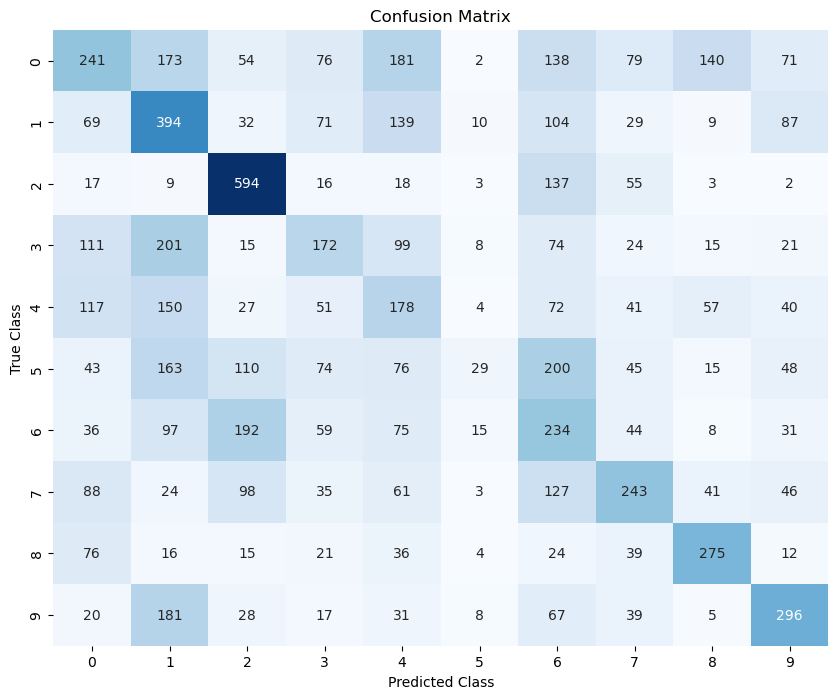

In [106]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

In [107]:
# testing the cross validation set:
logits = model(tensor_validation_X)
f_x = tf.nn.softmax(logits)

validation_predictions = tf.argmax(f_x, axis=1)

correct_predictions = tf.equal(validation_predictions, validation_vector_y)
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))
print(correct_predictions)
print(accuracy)
print(validation_vector_y)

tf.Tensor([ True  True False ... False False False], shape=(2000,), dtype=bool)
tf.Tensor(0.3, shape=(), dtype=float32)
tf.Tensor([8 8 0 ... 6 6 6], shape=(2000,), dtype=int64)


In [108]:
conf_matrix = tf.math.confusion_matrix(labels=validation_vector_y, predictions=validation_predictions)
print(conf_matrix)

tf.Tensor(
[[ 92  50  17  47  54   4  41  19  46  35]
 [ 20 103   6  20  37   4  15   8   5  26]
 [  4   6 100   2   3   0  38  10   0   0]
 [ 34  46   5  36  18   0  25   3   2   7]
 [ 56  36   6  24  38   2  22   9  17  31]
 [  6  51  29  21  13  15  48  16   2  12]
 [  8  23  50  15  11   4  57  14   1   8]
 [ 10   1  16   1  10   1  13  44   6   3]
 [ 37  12   1  14  11   2  11   6  86   4]
 [  1  11   6   0   3   2  11  11   4  29]], shape=(10, 10), dtype=int32)


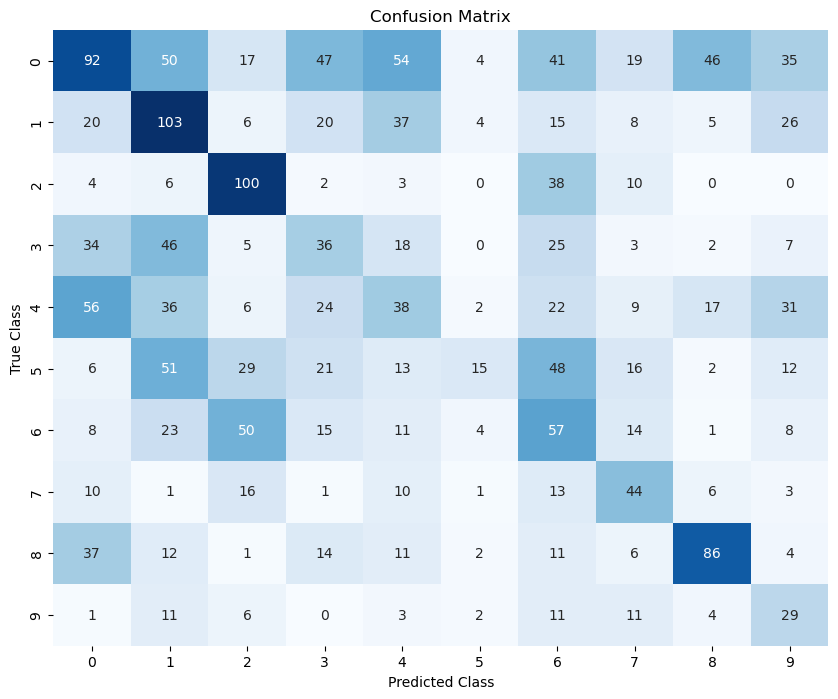

In [109]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()